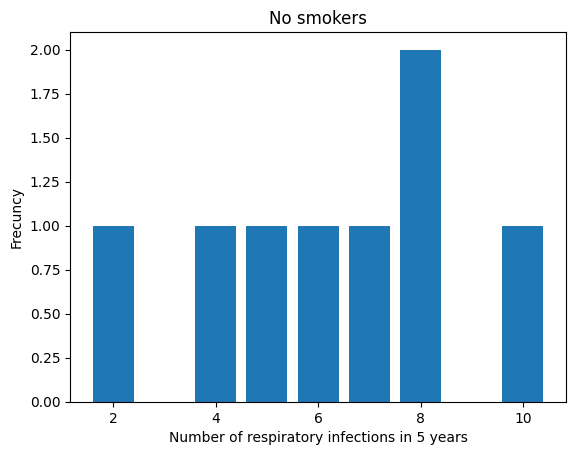

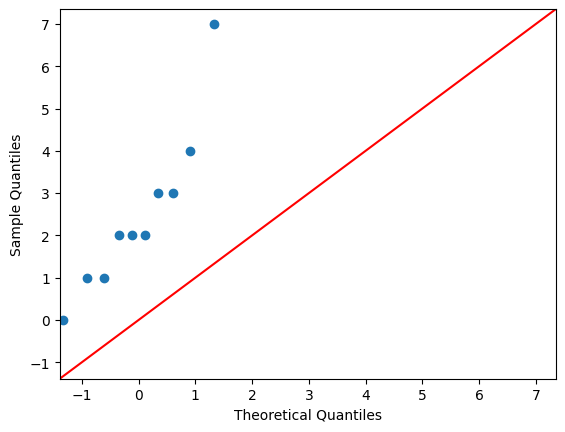

ShapiroResult(statistic=0.9829189777374268, pvalue=0.9758837223052979)
T-test    [-6.11, -1.39]
Name: CI95%, dtype: object


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
from scipy.stats import shapiro
import pingouin as pg

# Read the data
smokers = pd.Series([1, 0, 2, 7, 3, 1, 2, 2, 4, 3])
non_smokers = pd.Series([4, 2, 6, 5, 8, 10, 8, 7])

plt.figure()
plt.bar(non_smokers.unique(), non_smokers.value_counts(sort=False))
plt.xlabel('Number of respiratory infections in 5 years')
plt.ylabel('Frecuncy')
plt.title('No smokers')
plt.show()

sm.qqplot(smokers, line='45')
py.show()

# Sometimes, charts are not enough to understand the data.

# Ho: normalidad
# Ha: no normalidad
# Regla de decisión: Si el p-value es mayor o igual a mi alpha (probailidad de equovocarme) entonces NO RECHAZO H0.

# Alpha esta entre 0 y 1, comumente 0.001, 0.005, 0.01, (0.05), 0.1, 0.15; la alpha fijada siempre tiene que ser la misma salga la que salga, generalmente se usa 0.05 (5%), ya que 95% de confianza.
phnorm_non_smokers = shapiro(non_smokers)
print(phnorm_non_smokers)

ic = pg.ttest(smokers, non_smokers, paired=False, confidence=0.95)
print(ic['CI95%']) # solo interesa el intervalo, si hay diferencia entre los dos grupos, si tiende al 0 no hay diferencia, si no, si hay diferencia.
